In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as pt
import seaborn as sn

# all data sets for testing skills 

In [2]:
import os

In [3]:
class data:
    def __init__(self):
        pass

In [4]:
Data=data()
# del Data

In [5]:
#5000000

In [6]:
for _,_,filenames in os.walk("/home/kar/Desktop/jupyter/data/all_in_one/"):
    for i in filenames:
        if i.endswith(".csv") & ( os.path.isfile(f"/home/kar/Desktop/jupyter/data/all_in_one/{i}") ):
            siz=os.path.getsize(f"/home/kar/Desktop/jupyter/data/all_in_one/{i}")
            if ( siz < 5000000 ) :
                b=str(i).split(".")[0]
                b.replace("^[A-Za-z9-0]","_")
                try:
                    setattr(Data,b,pd.read_csv(f"/home/kar/Desktop/jupyter/data/all_in_one/{str(i)}"))
                except Exception as e:
                    print(f"no {i} {e}")
            elif ( siz > 5000000 ) :
                b=str(i).split(".")[0]
                b.replace("^[A-Za-z9-0]","_")
                try:
                    setattr(Data,b,pd.read_csv(f"/home/kar/Desktop/jupyter/data/all_in_one/{str(i)}",skiprows=lambda siz : siz % 20 ))
                except Exception as e:
                    print(f"no {i} {e} 2")

### Memory usage

In [7]:
Data.news_classification.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         21120 non-null  int64  
 1   TITLE      21120 non-null  object 
 2   URL        21120 non-null  object 
 3   PUBLISHER  21120 non-null  object 
 4   CATEGORY   21120 non-null  object 
 5   STORY      21120 non-null  object 
 6   HOSTNAME   21120 non-null  object 
 7   TIMESTAMP  21120 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [8]:
Data.census1994.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## data set 1st analysis in few step

In [9]:
df=Data.advertising

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [12]:
df.shape

(1000, 10)

In [ ]:
df.Age

In [13]:
df.columns=df.columns.str.replace("[^A-Za-z0-9]","_",regex=True)

### "numder of countries  in above is greater than that of real it means that there are different abriviations or name for same country  so we have to process country column. we can consider for cites"

In [13]:
df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [14]:
df.loc[:,df.columns.difference(["Male","Clicked_on_Ad"])].describe()

,Age,Area_Income,Daily_Internet_Usage,Daily_Time_Spent_on_Site
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.009000,55000.000080,180.000100,65.000200
std,8.785562,13414.634022,43.902339,15.853615
min,19.000000,13996.500000,104.780000,32.600000
25%,29.000000,47031.802500,138.830000,51.360000
50%,35.000000,57012.300000,183.130000,68.215000
75%,42.000000,65470.635000,218.792500,78.547500
max,61.000000,79484.800000,269.960000,91.430000


<AxesSubplot:xlabel='Age'>

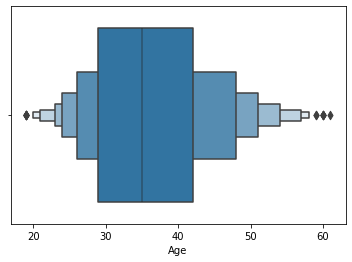

In [18]:
sn.boxenplot(x=df.Age)

### mostly people from Age 29 to 40 with around 3 Hr and 1hr  

In [20]:
df.loc[:,df.columns.difference(["Male","Clicked_on_Ad"])].describe(include="object")

,Ad_Topic_Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


### for as these are catagorical variable with one-hot encoding so by excluding we get good info from numerical variables

In [21]:
df[["Male","Clicked_on_Ad"]]=df[["Male","Clicked_on_Ad"]].astype(np.object0)

df[["Male","Clicked_on_Ad"]].describe()

,Male,Clicked_on_Ad
count,1000,1000
unique,2,2
top,0,0
freq,519,500


### balaced in male and female and Click_on ad also if the aim is to find your main and more spending or target demography

### for excluding some columns from table

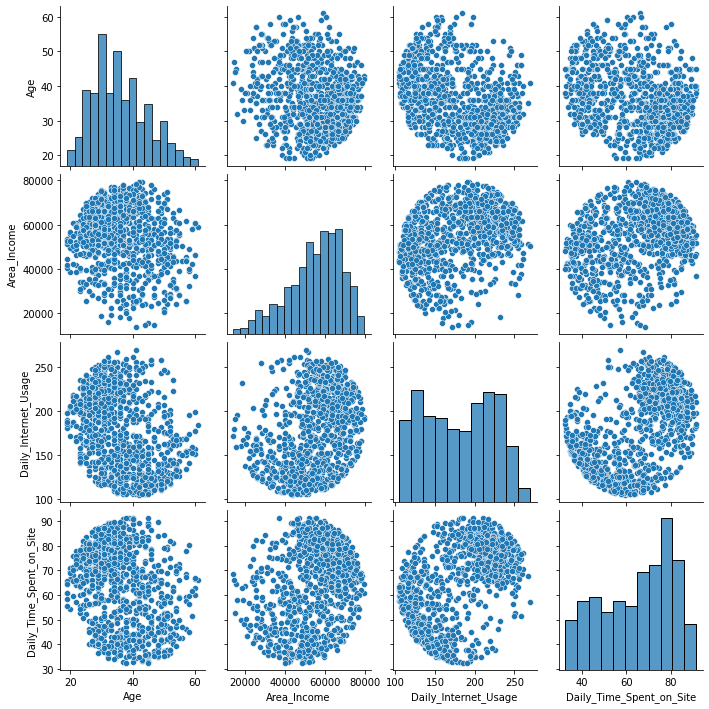

In [26]:
sn.pairplot(df.loc[:,df.columns.difference(["Male","Clicked_on_Ad"])].select_dtypes(exclude="object"))

### Standard Scaling
#### different scale wale do ya usse jyada features ka spread mean=0 and sd=1 to scale them same to apply distance algorithms like (man hatan , Eucladian etc.) 
#### jisski help se ache pridiction hote hai. outliers are bad for it so remove prior Standard.

In [59]:
from sklearn.preprocessing import StandardScaler,
data=StandardScaler().fit_transform(df[["Daily_Internet_Usage","Daily_Time_Spent_on_Site"]])

In [45]:
df_new=(df[["Daily_Internet_Usage","Daily_Time_Spent_on_Site"]]-df[["Daily_Internet_Usage","Daily_Time_Spent_on_Site"]].mean())/df[["Daily_Internet_Usage","Daily_Time_Spent_on_Site"]].std()

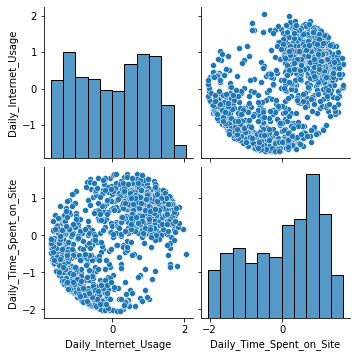

In [47]:
sn.pairplot(df_new)

In [55]:
data[0:10]

array([[ 1.73403   ,  0.24926659],
       [ 0.31380538,  0.96113227],
       [ 1.28758905,  0.28208309],
       [ 1.50157989,  0.57743162],
       [ 1.03873069,  0.21266356],
       [ 1.06516619, -0.31618701],
       [ 0.6463002 ,  1.50891544],
       [-1.09935459,  0.06309604],
       [ 0.94597853,  0.60141291],
       [ 0.08705257,  0.30795764]])

In [56]:
df_new[0:10]

,Daily_Internet_Usage,Daily_Time_Spent_on_Site
0,1.733163,0.249142
1,0.313648,0.960652
2,1.286945,0.281942
3,1.500829,0.577143
4,1.038211,0.212557
5,1.064633,-0.316029
6,0.645977,1.508161
7,-1.098805,0.063064
8,0.945505,0.601112
9,0.087009,0.307804


In [57]:
df[["Daily_Internet_Usage","Daily_Time_Spent_on_Site"]][0:10]

,Daily_Internet_Usage,Daily_Time_Spent_on_Site
0,256.09,68.95
1,193.77,80.23
2,236.50,69.47
3,245.89,74.15
4,225.58,68.37
5,226.74,59.99
6,208.36,88.91
7,131.76,66.00
8,221.51,74.53
9,183.82,69.88


## while Normalization And Standardization Apply fit to train and use transform to train and test using Fit Features gathered by fitting the Train for accurate results
### normalization - it is used for those variable that are  (outlier can cause problem)
- Minmax [0 to 1] - used when you know min and max ( like in cnn the pixel is 0-255 )
- Mean normalization [-1 to 1] - used for algorithm needs centerd data
- MaxAbsolute [ ( min /abs(max)) , +/-1] - used for sparsed data set 
- Robust - can remove outliers problem as it is function of Inter Quatial Range IRQ  


## handling skew data

<AxesSubplot:xlabel='Area_Income', ylabel='Count'>

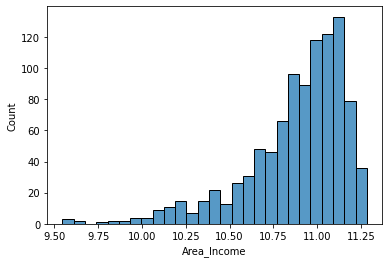

In [81]:
sn.histplot(np.log(df.Area_Income))

In [63]:
np.log10(df.Area_Income).skew()

-1.4453297725933176

In [64]:
df.Area_Income.skew()

-0.6503726674629562

<AxesSubplot:xlabel='Area_Income', ylabel='Count'>

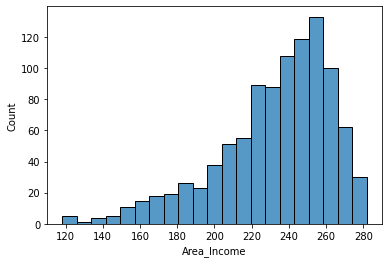

In [74]:
sn.histplot(np.sqrt(df.Area_Income))

In [67]:
from scipy import stats

<AxesSubplot:ylabel='Count'>

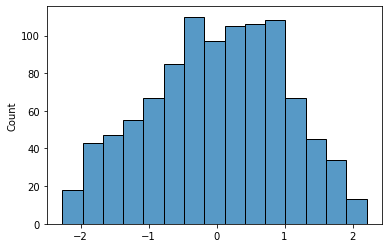

In [82]:
xx=pd.Series(stats.boxcox(df.Area_Income)[0])
sn.histplot((xx-xx.mean())/xx.std())

In [92]:
c=pd.Series(df.Country.unique())
c.where(c.str.contains("B"))

0           10
1           10
2           10
3           10
4           10
        ...   
232         10
233         10
234    Bermuda
235         10
236         10
Length: 237, dtype: object

## Feature Transformation
### Ordinal Feature (catagories to number) - Ordinalencoding One-Column only as result { C[0,1,2,0,2,1,3] }
### Lable Encoding is used for output variable to perform ONE HOT encoding to Y variables
### One Hot (nominal Data to number)- C-N (N=catagories)  C1[1,0,0],C2[0,0,1],C3[0,1,0]
#### drop first (DONOT USE IN TREES) is used to remove multicolinearty (no reation between all column mathametical relation ) effective in liner and logistic reg

In [31]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelBinarizer,LabelEncoder

## Imputation transformer for completing missing values.

In [11]:
from sklearn.impute import SimpleImputer
SimpleImputer()

SimpleImputer()

## Column Transaformer
### Used to Transfrom all the columns at ones without lenghty approach

In [42]:
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [14]:
ct = ColumnTransformer(
[("norm1", OrdinalEncoder(categories=["lower","middel","Uppre"]), ["column1",]),
("norm2", Normalizer(norm='l1'), slice(2, 4))],remainder='passthrough')

## Pipeling
## include these at once
### -missing value handle
### -feature transformation
### -feature scaling
### -feature Selection
### -model training
### it combines Column Transfromation and Pridiction

In [87]:
df1=Data.titanic_full_train.copy(deep=True)
df1.head()
df1.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [88]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [83]:
df=df1.drop(columns="Survived")

## Missing value handle

In [89]:
trf=ColumnTransformer([
("impute_age",SimpleImputer(),[2]),
("impute_embark",SimpleImputer(strategy='most_frequent'),[6])    
],remainder="passthrough")

## feature Transformation

In [90]:
trf1=ColumnTransformer([
("one_hot_embark",OneHotEncoder(sparse=False,handle_unknown="ignore"),[1,6])    
],remainder="passthrough")

## feature Scaling

In [98]:
trf2=ColumnTransformer([
("scale",MinMaxScaler(),slice(0,10))    
])

## feature selection

In [99]:
trf3=SelectKBest(score_func=chi2,k=8)

## model ceation

In [100]:
trf4=DecisionTreeClassifier()

## Pipeline creation

In [101]:
pipe=Pipeline([("trf",trf),("trf1",trf1),("trf2",trf2),("trf3",trf3),("trf4",trf4)])

### to SEE THE diagram

In [102]:
from sklearn import set_config
set_config(display='diagram')

In [103]:
from sklearn.model_selection import train_test_split

In [57]:
Data.

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [104]:
X_train, X_test, y_train, y_test = train_test_split(
  df1.drop(columns=["Survived"]), df1.Survived, test_size=0.2, random_state=42)

In [105]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embark',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_embark',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf3',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7fc2c11b1310>)),
                ('trf4', DecisionTreeClassifier())])

In [106]:
yp=pipe.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

0.6256983240223464

# feature transform used for statistical algo like liner reg and logestic reg to make any distribution normal
# usually use custom create karne chahiye aur use all type and form QQ plot
- ## function transformer
    - ## log 
not used on -ve value data AND when the data is right skewed
    - ## reciprocal (1/x)
change or flip the distribution horizontally
    - ## square (x^2)
used for left skewed data
    - ## square-root sqrt(x)
used for right skewed data
- ## power transform
    - ## box-cox (lambda = [-5 to 5])
optimal number of power (lambda)  that decide best function for power
    - must be used for +ve number only no -ve
    - ## yeo-jonson
works in -ve and +ve and it is a adjustment  in box-cox
- ## Quantile transform

In [3]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
QuantileTransformer()

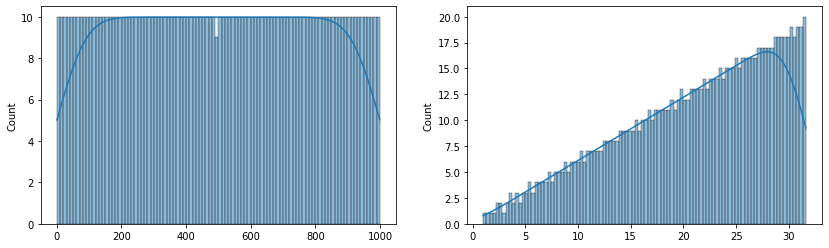

In [71]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(np.arange(1,1000),kde=True,bins=100)

# pt.subplot(122)
# sn.histplot(pd.DataFrame(np.sqrt(np.arange(1,1000))).apply(lambda x:1/(x+0.00001)),kde=True,bins=100)

pt.subplot(122)
sn.histplot(np.sqrt(np.arange(1,1000)),kde=True,bins=100)

# pt.subplot(122)
# probplot(np.sqrt(np.arange(1,100)),plot=pt)
# pt.title("QQ plot")
pt.show()

In [8]:
df=Data.titanic_full_train.copy(deep=False)

In [14]:
df=df[["Age","Survived","Fare"]]

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
df.head()

,Age,Survived,Fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [2]:
df.Age.fillna(df.Age.mean(),inplace=True)

### QQ plot is using probplot

In [23]:
from scipy.stats import probplot

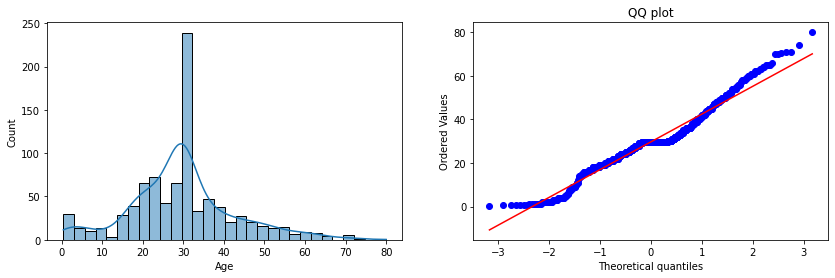

In [28]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(df.Age,kde=True)

pt.subplot(122)
probplot(df.Age,plot=pt)
pt.title("QQ plot")
pt.show()

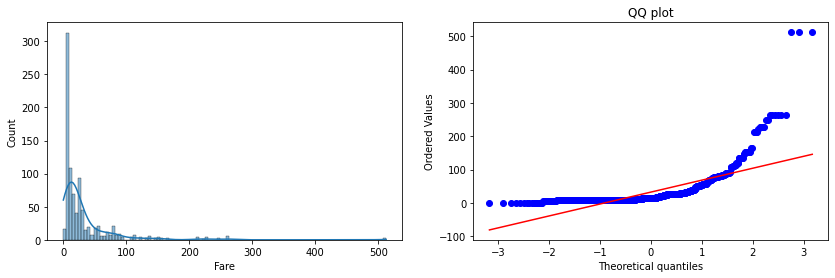

In [29]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(df.Fare,kde=True)

pt.subplot(122)
probplot(df.Fare,plot=pt)
pt.title("QQ plot")
pt.show()

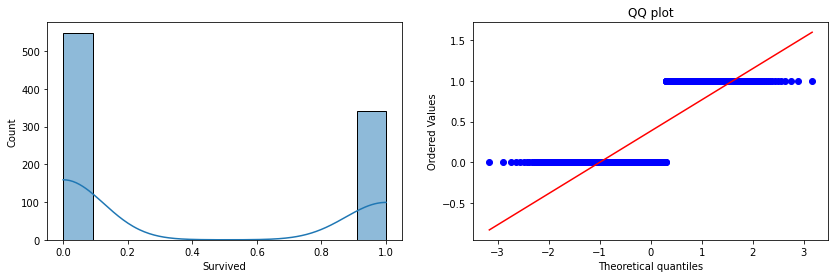

In [30]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(df.Survived,kde=True)

pt.subplot(122)
probplot(df.Survived,plot=pt)
pt.title("QQ plot")
pt.show()

In [32]:
ff=FunctionTransformer(func=np.log1p) # for log(1 + x)

In [33]:
g=ff.fit_transform(df.Fare)

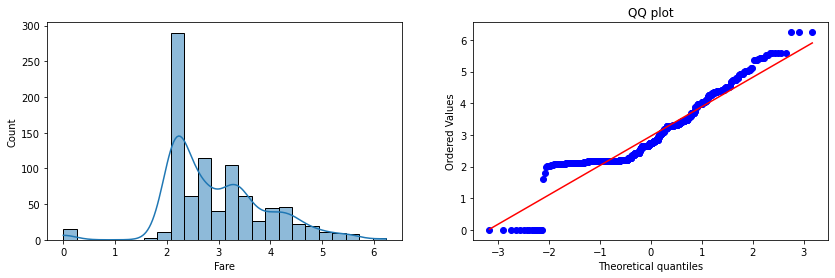

In [34]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(g,kde=True)

pt.subplot(122)
probplot(g,plot=pt)
pt.title("QQ plot")
pt.show()

In [42]:
from sklearn.preprocessing import PowerTransformer #{'yeo-johnson', 'box-cox'} can be used onlly

In [56]:
fg=PowerTransformer()
gf=fg.fit_transform(df)

array([ 0.81974384, -2.07966635, -0.09778703])

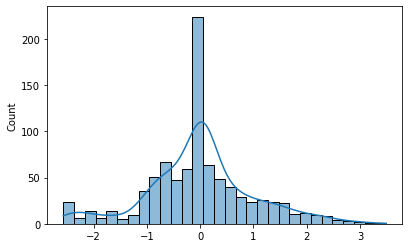

In [60]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(gf[:,0],kde=True)
fg.lambdas_

<AxesSubplot:xlabel='Survived', ylabel='Count'>

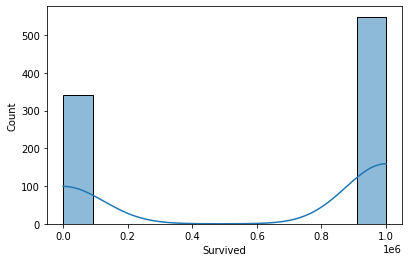

In [65]:
pt.figure(figsize=(14,4))
pt.subplot(121)
sn.histplot(df.Survived.apply(lambda x : 1/(x+0.000001) ),kde=True)

## numerical to catigorie used for outlier handling and good data spread
### binning 
- ### unsupervised binning
* - Equal width (uniform) - we assume binsizes and it will be same as bins in histlpot which are of EQUAL WIDTH bins
* - Equal Frequwncy (quantile) - we assume binsizes and divide it in binsize percentile/quantiles RESULT in good with outlier and uniform value spread
* - K-mean - use k mean to form clusters bins is equal to centroids in k-means 
- ### supervised binning
* - Decision Tree -
- coustom binning
### binarization in this we convert to 0 or 1 if value is greater than certain vale
#### like if 21 > age "not drink"
#### else if 21 < age 'can drink'

In [73]:
from sklearn.preprocessing import KBinsDiscretizer,KernelCenterer

In [ ]:
KernelCenterer()

In [ ]:
KBinsDiscretizer(strategy='uniform') # strategy :{'uniform', 'quantile', 'kmeans'}               ## encode : {'onehot', 'onehot-dense', 'ordinal'}

In [74]:
from sklearn.preprocessing import Binarizer

In [ ]:
Binarizer(threshold=0)

## Mixed variable handling
### [1,2,3,A,C,4,R]
### divide them to 2 [numeric, catagori]
### C1[1,2,3,4]
### C2[A,C,R]

## DATE COLUMN handle

In [9]:
df=Data.GOemployee_data.copy(deep=True)

In [11]:
df.DATE_OF_JOINING=pd.to_datetime(df.DATE_OF_JOINING)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AGENT_ID            1200 non-null   object        
 1   AGENT_NAME          1200 non-null   object        
 2   DATE_OF_JOINING     1200 non-null   datetime64[ns]
 3   ADDRESS_LINE1       1200 non-null   object        
 4   ADDRESS_LINE2       179 non-null    object        
 5   CITY                1193 non-null   object        
 6   STATE               1200 non-null   object        
 7   POSTAL_CODE         1200 non-null   int64         
 8   EMP_ROUTING_NUMBER  1200 non-null   int64         
 9   EMP_ACCT_NUMBER     1200 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 93.9+ KB


In [17]:
df["date_year"]=df.DATE_OF_JOINING.dt.year

In [18]:
df.date_year

0       1993
1       2005
2       2003
3       2004
4       2011
        ... 
1195    2005
1196    1993
1197    1993
1198    2004
1199    1999
Name: date_year, Length: 1200, dtype: int64

In [22]:
df["dmname"]=df.DATE_OF_JOINING.dt.month_name()
df["ddname"]=df.DATE_OF_JOINING.dt.day_name()

In [23]:
df.dmname

0            June
1        December
2       September
3       September
4            June
          ...    
1195    September
1196     December
1197    September
1198      October
1199          May
Name: dmname, Length: 1200, dtype: object

In [24]:
df.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,date_year,dmname,ddname
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585,1993,June,Saturday
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204,2005,December,Tuesday
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590,2003,September,Tuesday
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581,2004,September,Thursday
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134,2011,June,Tuesday


In [25]:
df=Data.ufo

In [27]:
df.Time=pd.to_datetime(df.Time)

In [29]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [28]:
df.Time.dt.day_of_week

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

# Missing Data handling
- eleminate row - `used when Missing completely at random 5% > missing% of data for row and 95% > of column data are missing` and compre histogram before and after is close in `numerical` and value_count is ratio same in `catagorical` it checks `Missing completely at random` we good to go.
- impute row
    - univarient (simple imputer)
        - numerical **( if 5% >  missing and MCAR ) compre histogram before and after is close good** `sk.SimpleImputer()` **`can change covarience , Outliers and Shape of distribution`**
            - mean - when have standard distribution **`can change covarience , Outliers and Shape of distribution`**
            - median - when have skewed distribution **`can change covarience , Outliers and Shape of distribution`**
            - random - random from set from present in available data (intact distribution most of the time and can change covarience) not to use with decision tree type algo
            - constant/Arbitary - `(NMAR) to show data is missing here we impute with -1, ya aukat se bahar of that distribution`
            - end of distributeion - for normal distributed `(mean + 3 * std) or (mean - 3 * std)`
                                 for skewed dist `(Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)`  IQR =Q3-Q1
        - catagorical
            - mode - replace with mode good to use when < 5% is missing
            - random - random from set from present in available data (intact distribution most of the time and can change covarience) not to use with decision tree type algo
            - missing/Arbitary - (NMAR) create 'missing' as a catagory to tell SimpleImputer(strategy='constant',fill_value='Missing')
    - multivarient ( impute the value in one column according to other its relation to other features)
        - KNN imputer - with certain k  let 3 `(weighted eucladian distance aka nan_eucaldian) used as some other rows also can have a null value in one or more of its rows so three close proximity rows (close proxi of other column when maped in n dimensional matrix and distance cal with eucladian )` with seeking feature known and avg those three to impute in place of missing
             - advantages
                 - more accurate
                 - good with less,modrate size data
             - disadv
                 - more number of calculation
                 - production memory proble
        - Itterative imputer (use when Missing at Random) with same disadv as KNNImputer  
            - change Nan with mean take it as traning data
            - take the original data set for testing
            - train any model on aur itterate the 1st till N number of itteration 

### imputing feature having < 5% missing can retain the kde for good data identity retension but can change in coverince

### missing indicator - it use another column `lable if the value is missing in or not` `SimpleImputer(add_indicator=True)` OR `MissingIndicator()`

### grid search cv for imputation

In [9]:
from sklearn.impute import KNNImputer

In [12]:
KNNImputer(n_neighbors=4)
# weights : uniform use mean
# weights : distance use closer numder get more recog in mean calculate

KNNImputer(n_neighbors=4)

In [1]:
from sklearn.impute import IterativeImputer

## outlier Handling
### remove outlier when it is useless or can effect alog very bad
### not to remove when it is usefull like Anomally detecction
### outlier is bad for those using Weights
- linera reg
- logistic reg
- adaboost
- deep learning
### Approach
- #### trimming (remove them whole) use when skewed
- #### capping (it will replaced with upper limit or lower) use when skewed
- #### missing value treat as missing value
- #### discretization (binning)
- ### winsorization - capping with percentile (not using IRQ) domain knowledge 
- for normal distributed `(mean + 3 * std) or (mean - 3 * std)`
- for skewed dist `(Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)`  IQR =Q3-Q1

----------------------------------
### z-score uesd in normal distribution
### data is between (mean + 3 * std) to (mean - 3 * std)
### xi=(xn - mean)/std    | must (-3 < x1 < +3) 
----------------

### 25% in decribe show 25% of is lower then this Q1 `np.percentile(0.25)`
### 50% in decribe show 50% of is lower then this Q2
### 75% in decribe show 75% of is lower then this Q3
### Q3-Q1=IQR all but out lier are (Q1 - 1.5 * IQR) < x < (Q3 + 1.5 * IQR)

### Capping

In [16]:
np.where( x > (Q3 + 1.5 * IQR), ## if x is grater 
         (Q3 + 1.5 * IQR), ## convert to uperlimit
         np.where(x <(Q1 - 1.5 * IQR),## if x is less 
                  (Q1 - 1.5 * IQR),## convert to lowerlimit
                  x)) # else as it is

###  feature construction 
### using two or more feature to cearte another featue column
### feature spliting
### dividing a featue to N features


### Dimension reduction
- feature selection `spread of data is most in which column when plotted against another column with more spread is good `**if same**``
    - Forward selection
    - backward selection
- feature extraction
    - PCA rotate the axis `y -> y' and x -> x'` and that axis having more spread will be consider as `pc1 1...N and top 3 or K in showing max spread or varianc corrospond to eigen vale ( SO REMOVE OUTLIER FIRST IS SUGGESTED )will be selected (K is number of component you want after PCA )` then data is transformed according to those new rotated axis.
    - LDA
    - t-sim